In [1]:
import sys
sys.path.append("../../")

# GaussianProcess

In [2]:
from neuralprocesses.utils.gp import GaussianProcess
from neuralprocesses.utils.gp import squared_exponential_kernel

import tensorflow as tf

## Basic examples

Choose the x-coordinates.

In [3]:
x = tf.constant([list(range(50))], dtype=tf.float32)

Setup a Gaussian process with a squared-exponential kernel of correlation length 10.

In [4]:
gp = GaussianProcess(squared_exponential_kernel(x, 10.))

Compute a sample of y-values and stack them with the x-values.

In [5]:
f = tf.transpose(tf.reshape(tf.stack([x, gp.sample]), (2, -1)))

Run this Tensorflow graph and print the first few rows of the result.

In [6]:
with tf.Session() as session:
    result = session.run(f)

print(result[:5, :])

[[0.         0.08246706]
 [1.         0.06465264]
 [2.         0.02609815]
 [3.         0.04139516]
 [4.         0.01120139]]


Plot the function that we just sampled from the GP.

In [7]:
from neuralprocesses.utils.plotting import list_plot

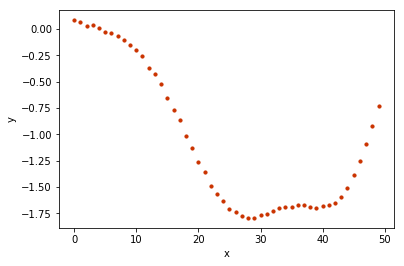

In [8]:
list_plot(result, axes_label=("x", "y"))

## Scope

### Conditioned GP

Choose the x-coordinates.

In [9]:
x_target = tf.constant([list(range(50))], dtype=tf.float32)

In [10]:
x_context = tf.constant([[13.5, 39.5]], dtype=tf.float32)

In [11]:
y_context = tf.constant([[3, 0.5]], dtype=tf.float32)

In [12]:
x = tf.concat([x_context, x_target], 1)

Setup a Gaussian process with a squared-exponential kernel of correlation length 10.

In [13]:
gp = GaussianProcess(squared_exponential_kernel(x, 10.), context_values=y_context)

Compute a sample of y-values and stack them with the x-values (`f`). Then do the same with the mean values (`f0`) and confidence interval bounds (`fm` and `fp`).

In [14]:
from neuralprocesses.utils.tf_utils import tf_sort_by_col

In [15]:
f = tf_sort_by_col(tf.transpose(tf.reshape(tf.stack([x, gp.sample]), (2, -1))), 0)
fp = tf_sort_by_col(tf.transpose(tf.reshape(tf.stack([x, gp.mean + gp.standard_deviation]), (2, -1))), 0)
fm = tf_sort_by_col(tf.transpose(tf.reshape(tf.stack([x, gp.mean - gp.standard_deviation]), (2, -1))), 0)
f0 = tf_sort_by_col(tf.transpose(tf.reshape(tf.stack([x, gp.mean]), (2, -1))), 0)

Run this Tensorflow graph and print the first few rows of the result.

In [16]:
with tf.Session() as session:
    writer = tf.summary.FileWriter("/home/jem-mosig/projects/ml/blog-garnelo_neural_2018/_draft/tb", session.graph)
    writer.close()
    s, sp, sm, s0, var = session.run([f, fp, fm, f0, (gp.variance)])
    #s, s0 = session.run([f, f0])

Plot the function that we just sampled from the GP.

In [17]:
from neuralprocesses.utils.plotting import list_plot
from neuralprocesses.utils.plotting import Color

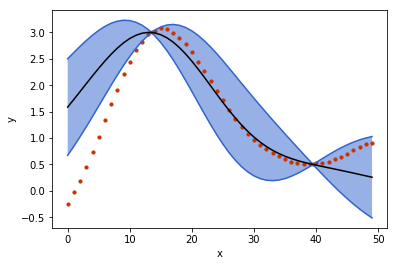

In [18]:
list_plot([s, sp, sm, s0],
          joined=[False,True,True,True], 
          mesh=[True,False,False,False],
          plot_style=[
              Color.color_data(n=0),      # Sample in red
              Color.color_data(n=1),      # Confidence interval bounds in blue
              Color.color_data(n=1),
              Color((0., 0., 0.))],       # Mean in black
          axes_label=("x", "y"),
          filling=[[1,2]]
    )